## Predicting flue gas emissions (Co2 and Nox) by measuring instances of other gas outputs near a gas turbine in Turkey 

In [12]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
 # Folder containing CSVs
path = "/Users/gemmaboyle/Desktop/gas emissions/"

# Get names of all CSV files under path
names = glob.glob(path + "*.csv") 

file_list = pd.concat([pd.read_csv(filename) for filename in names])

#save the DataFrame to a single file
file_list.to_csv("gas_emissions.csv")

In [5]:
df = pd.read_csv('/Users/gemmaboyle/Desktop/gas emissions/gas_emissions.csv')

In [6]:
df.head()

,Unnamed: 0,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0,8.8358,1022.2,98.762,3.2422,23.152,1067.5,549.94,126.16,11.381,1.9157,68.292
1,1,9.0529,1021.8,97.464,3.2074,23.207,1067.9,549.80,126.51,11.476,2.0596,68.610
2,2,9.2464,1021.3,96.494,3.2051,23.296,1068.5,549.89,126.96,11.555,2.1621,68.324
3,3,9.3792,1020.9,95.912,3.2159,23.465,1069.6,549.94,127.83,11.539,2.1214,67.619
4,4,9.5757,1020.8,95.412,3.1898,23.205,1068.1,549.83,126.56,11.484,2.1549,66.499


In [7]:
df = df.drop(columns='Unnamed: 0')

In [8]:
df.shape

(36733, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB


In [9]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,2.372468,65.293067
std,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,2.262672,11.678357
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,0.000388,25.905000
25%,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,1.182400,57.162000
50%,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,1.713500,63.849000
75%,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,2.842900,71.548000
max,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,44.103000,119.910000


In [ ]:
data_dictionary = {'AT':'Ambient temperature', 'AP':'Ambient pressure', 'AH':'Ambient humidity',
                   'AFDP':'Air filter difference pressure', 'GTEP':'Gas turbine exhaust pressure', 
                   'TIT':'Turbine inlet temperature', 'TAT':'Turbine after temperature', 
                  'TEY':'Turbine energy yield', 'CDP':'Compressor discharge pressure', 'CO':'Carbon monoxide',
                   'NOX':'Nitrogen Oxides'}

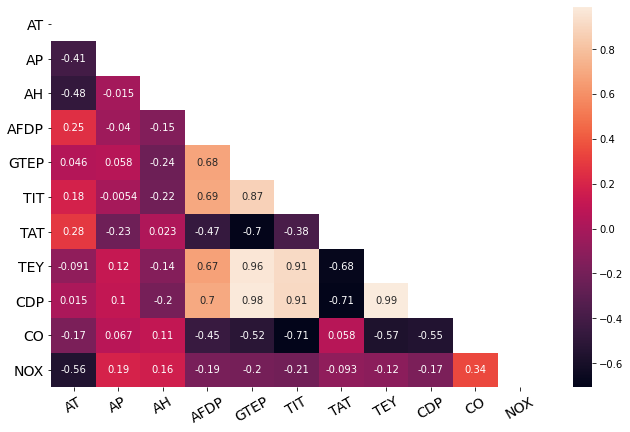

In [13]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(11, 7))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)
    ax.set_ylim([df.shape[1], 0])
    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    return fig, ax



fig, ax = correlation_heat_map(df)

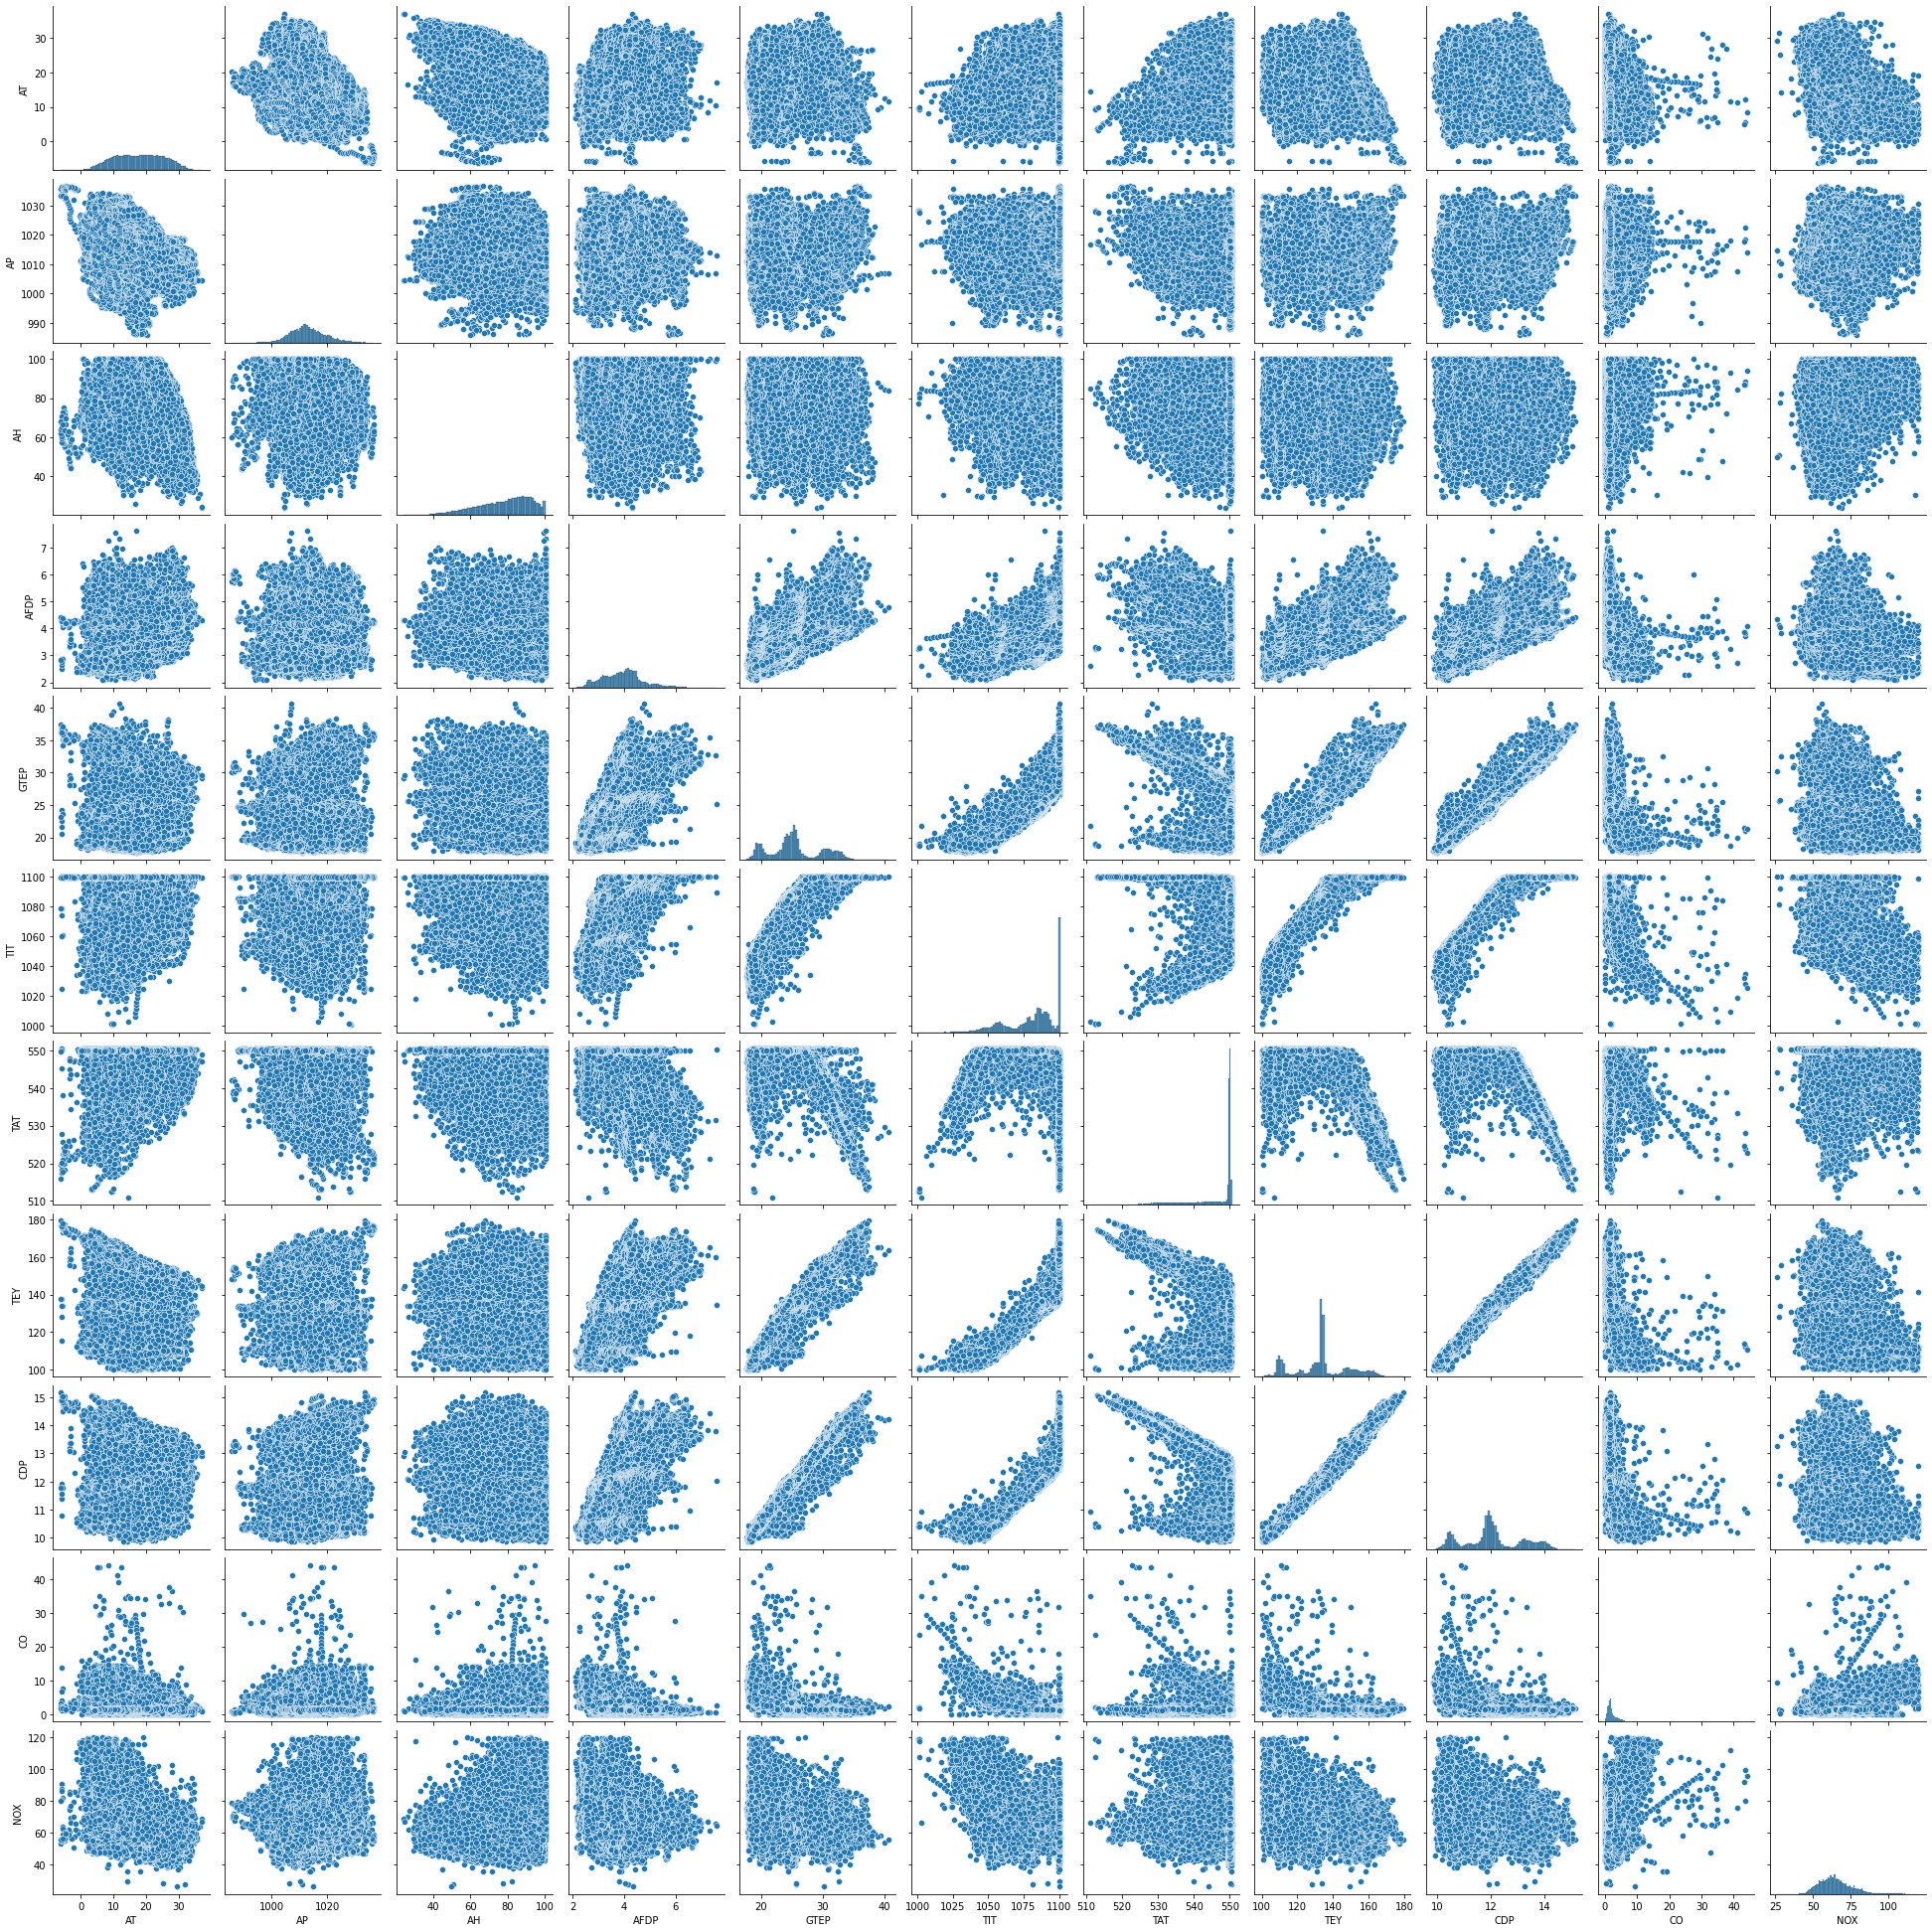

In [14]:
sns.pairplot(df)

<AxesSubplot:ylabel='Density'>

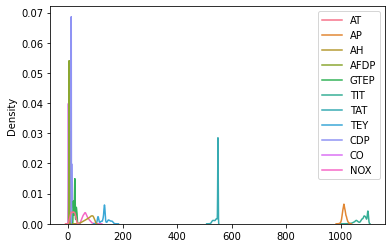

In [19]:
sns.kdeplot(data=df)

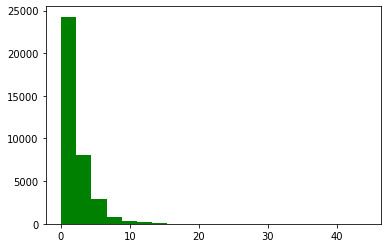

In [22]:
plt.hist(df.CO, bins=20, color='green');

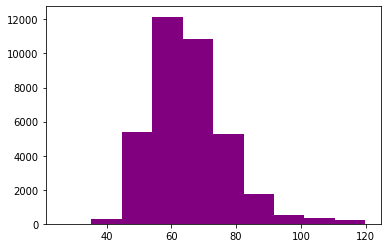

In [23]:
plt.hist(df.NOX, color='purple');